In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### 构建模型

In [62]:
model = Sequential([
    # 定义一个全连接层（Dense Layer），其中包含4个神经元，输入的是一个长度为2的一维数组(即输入层有两个输入)
    Dense(4, input_shape=(2,)),
    # 激活函数（输出）为sigmoid
    Activation('sigmoid'),
    # 一个输出(因为Sequential Model是一个顺序叠加的网络结构，每一层的输入都是前一层的输出，所以这里不必再重复定义输出层和全连接层的输入格式，网络会根据前面层的信息来自动生成。)
    Dense(1),
    Activation('sigmoid')
])   

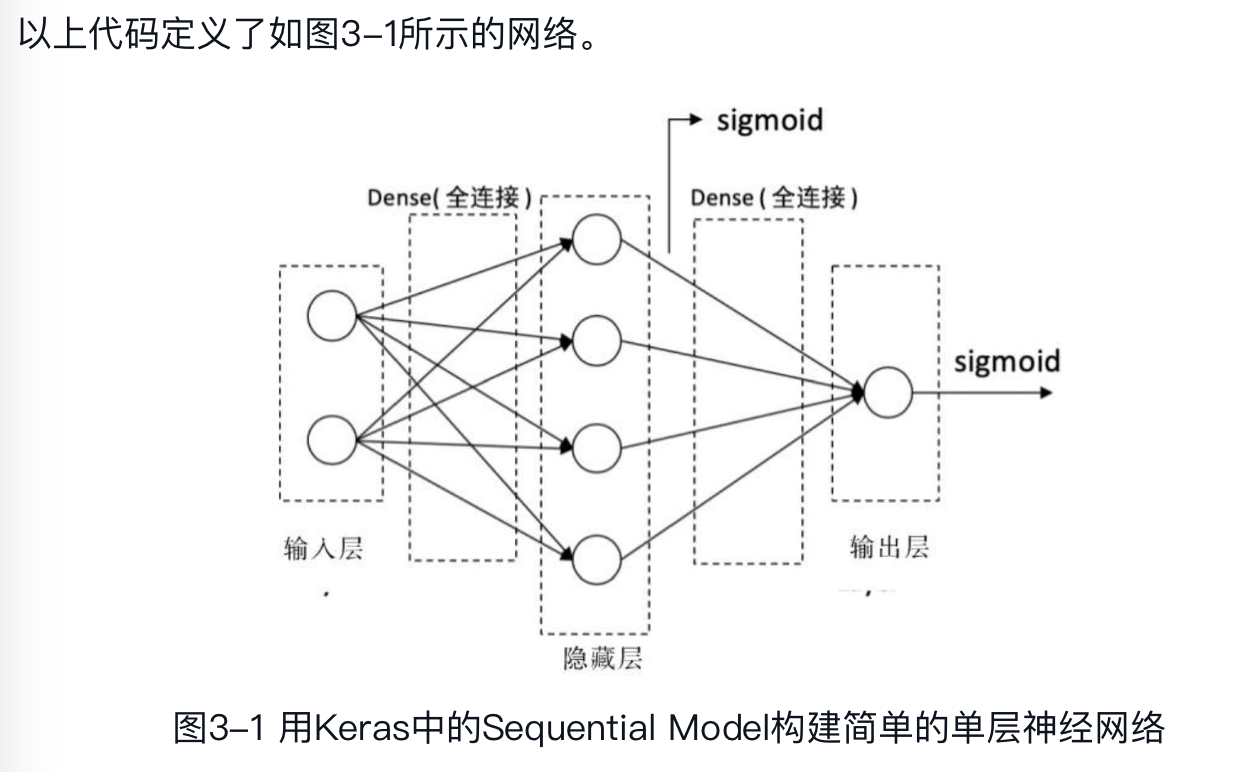

In [63]:
import tensorflow as tf

# 指定learning_rate=0.001, loss_function计算方式为mse, 将预测准确率作为评价标准
model.compile(optimizer=tf.optimizers.Adam(0.001), loss='mse', metrics=['accuracy'])

### 训练和测试

#### 训练模型

In [64]:
import numpy as np

# 定义训练数据为100条
training_number = 100
# 生成一个(100,2)的随机数向量
training_data = np.random.random((training_number, 2))
training_data

array([[0.56400422, 0.97600219],
       [0.36700959, 0.19057503],
       [0.82113499, 0.91331271],
       [0.99055435, 0.81148994],
       [0.03926268, 0.26685249],
       [0.09741553, 0.89898026],
       [0.14034997, 0.38519677],
       [0.79842704, 0.07700275],
       [0.62574206, 0.0033036 ],
       [0.72501033, 0.64870221],
       [0.21170889, 0.92101729],
       [0.70376872, 0.73845514],
       [0.08830985, 0.97934318],
       [0.82026946, 0.28094976],
       [0.0055727 , 0.91170604],
       [0.21858405, 0.98339135],
       [0.32615586, 0.97205299],
       [0.03830991, 0.05781661],
       [0.9940687 , 0.40185914],
       [0.95015991, 0.17221761],
       [0.95442619, 0.02135716],
       [0.25832482, 0.25403934],
       [0.1117331 , 0.80329876],
       [0.7433139 , 0.28968812],
       [0.90333279, 0.94950505],
       [0.56446571, 0.25355953],
       [0.04221858, 0.32005758],
       [0.21459715, 0.06565376],
       [0.41172295, 0.9117608 ],
       [0.5772539 , 0.90560226],
       [0.

In [65]:

# 对训练数据生成标签(第一个数<第二个数标签为1)
# 必须转换为np.array
labels = np.asarray([(1 if data[0]<data[1] else 0) for data in training_data])

model.fit(training_data, labels, epochs=20, batch_size=32)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2508 - accuracy: 0.4700
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2505 - accuracy: 0.4800
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.5200
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5100
Epoch 7/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.5000
Epoch 8/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.5200
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.5200
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.5200
Epoch 11/20
4/4 [======================

#### 测试模型

In [66]:
# 测试数据
test_number = 100
test_data = np.random.random((test_number, 2))
# 构造准确的值
expected = np.asarray([(1 if data[0]<data[1] else 0) for data in test_data])
error = 0

for i in range(0, test_number):
    data = test_data[i].reshape(1, 2)
    predict =0 if model.predict(data) < 0.5 else 1
    if (predict != expected[i]):
        error += 1

print(f'total error:{error}   accuracy:{1.0-error/test_number}')
    

1/1 [==============================] - 0s 17ms/step
total error:51   accuracy:0.49


In [67]:
def train_and_test(n_train=100, n_epoch=20):
    '''
    训练并预测模型
    '''
    # 训练模型
    # 生成随机数向量
    training_data = np.random.random((n_train, 2))
    # 对训练数据生成标签(第一个数<第二个数标签为1)
    # 必须转换为np.array
    labels = np.asarray([(1 if data[0]<data[1] else 0) for data in training_data])
    # 进行拟合
    model.fit(training_data, labels, epochs=n_epoch, batch_size=32)

    # 测试数据
    test_number = 100
    test_data = np.random.random((test_number, 2))
    # 构造准确的值
    expected = np.asarray([(1 if data[0]<data[1] else 0) for data in test_data])
    # 统计错误的数量
    total_error = 0

    for i in range(0, test_number):
        data = test_data[i].reshape(1, 2)
        predict =0 if model.predict(data) < 0.5 else 1
        if (predict != expected[i]):
            total_error += 1

    accuracy = 1.0-total_error/test_number
    print(f'n_train={n_train} n_epoch={n_epoch} total_err={total_error} accuracy={accuracy}')

In [68]:

train_and_test(10000, 20)

Epoch 1/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2379 - accuracy: 0.7071
Epoch 2/20
313/313 [==============================] - 0s 1ms/step - loss: 0.2190 - accuracy: 0.8443
Epoch 3/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1961 - accuracy: 0.8909
Epoch 4/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1711 - accuracy: 0.9167
Epoch 5/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9342
Epoch 6/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1264 - accuracy: 0.9483
Epoch 7/20
313/313 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9577
Epoch 8/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9663
Epoch 9/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0844 - accuracy: 0.9738
Epoch 10/20
313/313 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9799

通过增加训练数据和epoch都可以提高准确率, 训练数据1w时准确率达到99%

|n_train|n_epoch|accuracy|
|---|---|---|
|100|20|0.44|
|300|20|0.85|
|500|20|0.89|
|100|50|0.4|
|100|100|0.74|
|10000|20|0.99|